Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# (1)Read the dataset to the python environment.

In [123]:
data = pd.read_excel('F:/ICT/python_programming/dataset_3/iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
data.shape

(150, 5)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [126]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [127]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Our iris dataset has 150 rows and 5 columns. And our dataset have missing values. 

We need to perform some preprocessing techniques to remove these missing values. And all our missing data have float datatype.

# (2)Do necessary pre-processing steps.

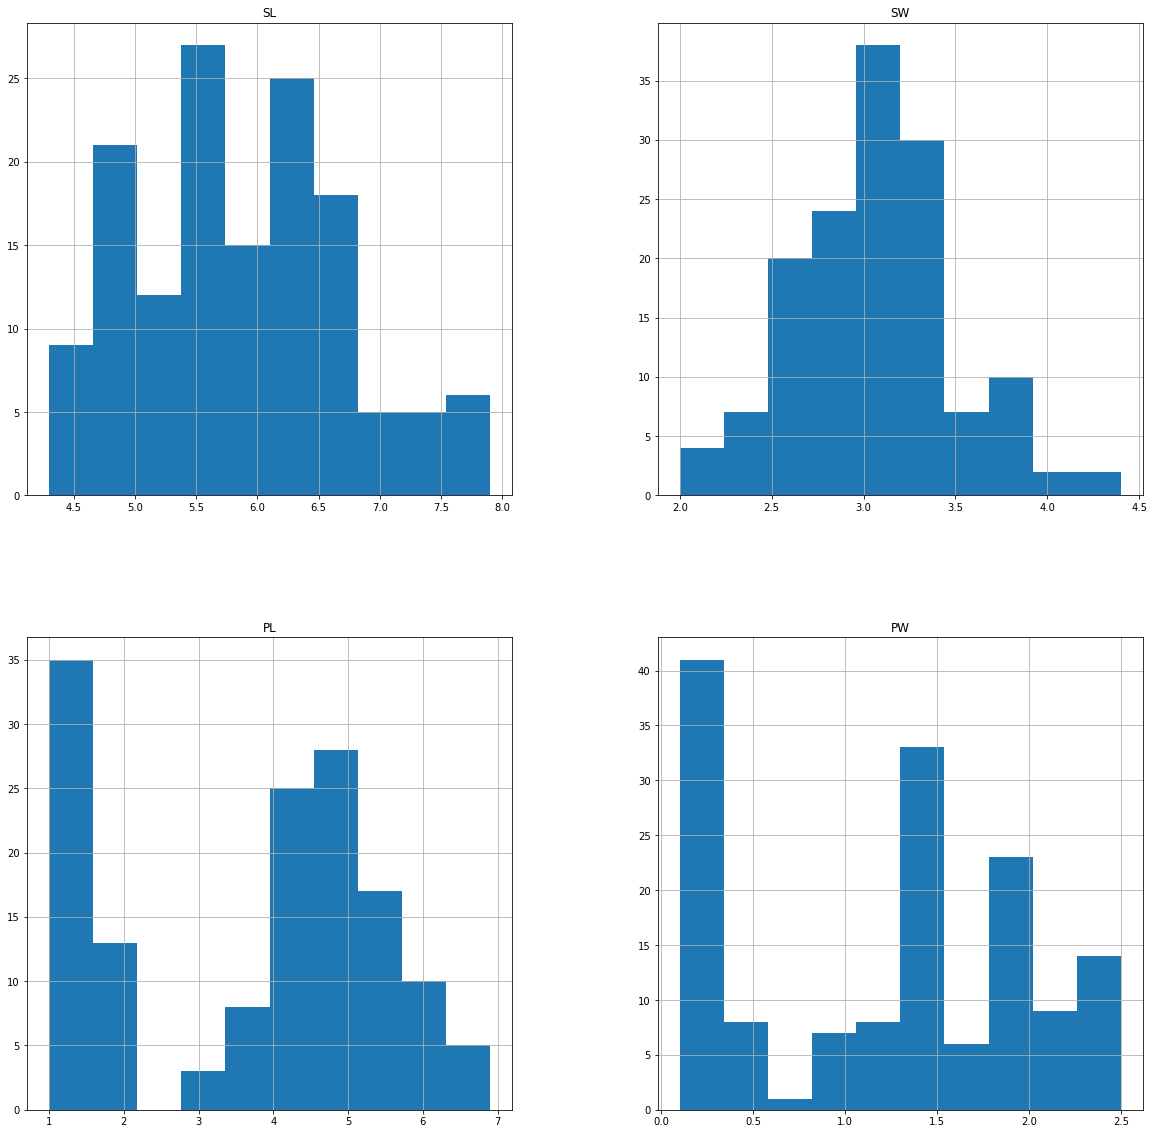

In [128]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,20))
plt.show()

To fill our missing data we can use median

In [129]:
data = data.fillna(data.median())

In [130]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

So we filled all missing data with median values.

In [131]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Here we have to change our datatype of Classification. i.e. object data type. It is in categorical form we have to change it into numerical form. FOr that we can use LabelEncoding.

In [132]:
data['Classification'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Classification, dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [134]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [135]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we have changed the classifications columns datatype from object to int.

NExt we have to find out is there any outlier values in our iris dataset.

Text(0.5, 1.0, 'Box plot of SL')

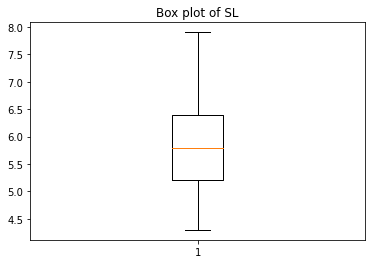

In [136]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

There is no outlier values for SL column.

Text(0.5, 1.0, 'Box plot of SW')

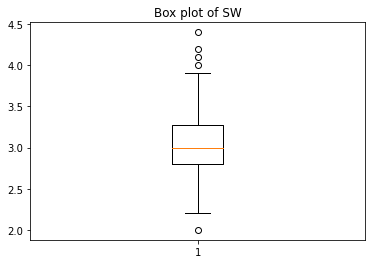

In [137]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Here we can see some outlier values. So we have to handle it. To do that we can use Inter Quartile Range(IQR)

In [138]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
print("Q1 :",Q1)
print("Q2 :",Q2)
print("Q3 :",Q3)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.25


In [139]:
data['SW'].median()

3.0

In [140]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  2.1249999999999996
Upper limit is :  3.9250000000000003


So we can remove all the values below lowelimit and above upper limit.

In [141]:
outlier = []
for i in data['SW']:
    if ((i>up_lim) or (i<low_lim)):
        outlier.append(i)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

We got the outlier values. Now we have to find out the index values.

In [142]:
ind1 = data['SW'] > up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [143]:
ind1 = data['SW'] < low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

We got the index values. Now we have to drop these values from our dataset. Only need to remove from the upperlimit values

In [144]:
data.drop([ 14, 15, 32, 33, 60], inplace=True)

In [145]:
data.shape

(145, 5)

Text(0.5, 1.0, 'Box plot of SW')

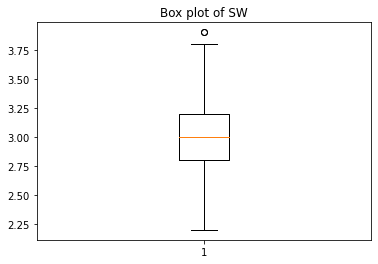

In [146]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

In [147]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'Box plot of PL')

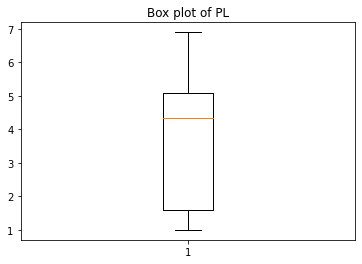

In [148]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

There is no outlier values in PL column

Text(0.5, 1.0, 'Box plot of PW')

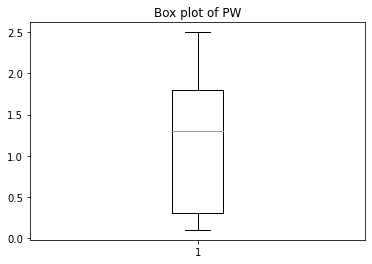

In [149]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

there is no outlier values for PW column also

Now we are going to perform min max scalling. TO do that first we split our dataset into x and y variables.

In [150]:
y = data['Classification']
x = data.drop('Classification', axis=1)

In [151]:
x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [152]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [153]:
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.435441,0.484381,0.482642,0.469540
std,0.226896,0.220208,0.290214,0.315925
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.352941,0.101695,0.083333
50%,0.416667,0.470588,0.567797,0.500000
75%,0.583333,0.588235,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


# (3)Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [155]:
x_train.shape

(116, 4)

In [156]:
y_train.shape

(116,)

In [157]:
x_test.shape

(29, 4)

In [158]:
y_test.shape

(29,)

### Random FOrest model

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [160]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc * 100,"%")


Accuracy is : 89.65517241379311 %


###  Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression
logic_model = LogisticRegression()
logic_model.fit(x_train, y_train)
y_pred = logic_model.predict(x_test)

In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [163]:
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc * 100,"%")

Accuracy is : 93.10344827586206 %


### KNN 

In [164]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbours = np.arange(3,15)

for k in neighbours:
    classifior = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifior.fit(x_train, y_train)
    y_pred = classifior.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [165]:
acc_values

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

Text(0, 0.5, 'accuracy')

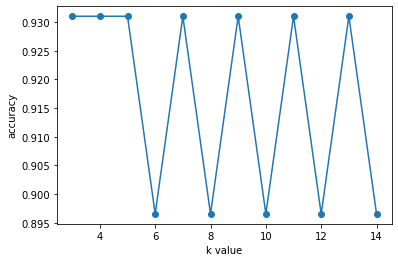

In [166]:
plt.plot(neighbours, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

Until 5 we got stable accuracy. So lets take k value as 5

In [167]:
classifior = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifior.fit(x_train, y_train)
y_pred = classifior.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc_values.append(acc)
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc * 100,"%")

Accuracy is : 93.10344827586206 %


### SVM 

In [168]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
acc = accuracy_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc * 100,"%")

Accuracy is : 89.65517241379311 %


In [169]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print("Accuracy is :", acc * 100,"%")

Accuracy is : 89.65517241379311 %


Insight : From these models KNN and Logistic regression gives the higher accuracy of 93%.